In [12]:
import numpy as np
import matplotlib.pyplot as plt

transcripts = []
with open('transcripts.txt', 'r') as f :
    for line in f :
        transcripts.append(line.strip())

reads = []
with open('transcript_reads.txt', 'r') as f :
    for line in f :
        reads.append(line.strip())

K = len(transcripts)
N = len(reads)

rho = np.array([0.2763549, 0.2158966, 0.03822885, 0.06552442, 0.40399523])
rho /= np.sum(rho)

print('Transcripts = ' + str(transcripts))
print('First 5 reads = ' + str(reads[0:5]))
print('(Real) rho = ' + str(rho))

Transcripts = ['ATCTCGACGCACTGC', 'GAGTTCGAACTCTTC', 'AGAGTTCCAGTGTCA', 'AAAGCTCACTGCGGA', 'AGCGATATCAGAGTD']
First 5 reads = ['AGAGT', 'CACTG', 'TCGAA', 'AGCTC', 'ATCTC']
(Real) rho = [0.2763549  0.2158966  0.03822885 0.06552442 0.40399523]


In [9]:
N_iter = 100 #Number of EM iterations

#A: Compatibility matrix. A[i, j] = 1 iff read i aligns to transcript j
A = np.zeros((N, K))
F = np.zeros((N, K))

#Naive alignment algorithm with no read errors
for i in range(N) :
    for j in range(K) :
        if reads[i] in transcripts[j] :
            A[i, j] = 1.

#Initialization of rho as uniform
rho_est = (1. / float(K)) * np.ones(K)

# ==============================================================================

#Problem 1.1
#TODO: Implement the EM algorithm to estimate the transcript abundance of rho (which we pretend is unknown to us)
#Save your final, updated estimates in rho_est

#For each EM iteration, store the Sum-of-squares error w.r.t the true rho in this vector
sse_per_iteration = np.ones(N_iter) * np.inf

for iter in range(0, N_iter):
    for i in range(N) :
        for j in range(K) :
            # E-step : assign fractional contributions
            F[i, j] = A[i, j] * rho_est[j] / np.sum(A[i]*rho_est, axis=0)
    # M-step : update rho estimates
    rho_est = (1/N) * np.sum(F, axis=0)
    # normalize rho_est
    rho_est = rho_est / np.sum(rho_est)
    sse_per_iteration[iter] = np.sum(np.power(rho_est - rho, 2))


# ==============================================================================

print('(Real) rho = ' + str(rho))
print('(Est.) rho = ' + str(rho_est))

print('Final SSE = ' + str(round(sse_per_iteration[-1], 6)))


(Real) rho = [0.2763549  0.2158966  0.03822885 0.06552442 0.40399523]
(Est.) rho = [0.27817568 0.19989501 0.03950012 0.07982432 0.40260487]
Final SSE = 0.000467


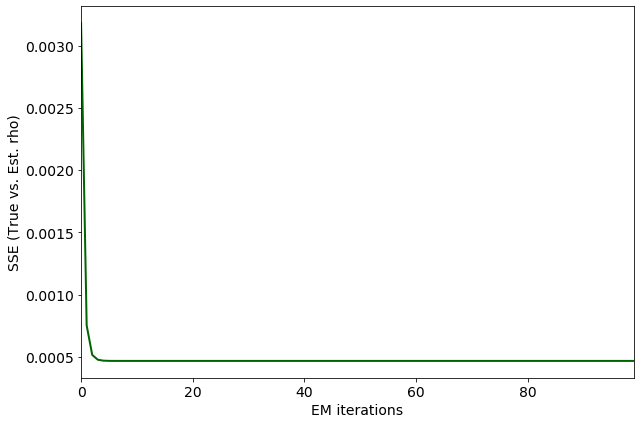

In [11]:

#Run this cell to get a plot of the Sum-of-square error between the true rho and your EM estimate

f = plt.figure(figsize=(9, 6))

plt.plot(np.arange(N_iter), sse_per_iteration, linewidth=2, c='darkgreen')

plt.xlabel('EM iterations', fontsize=14)
plt.ylabel('SSE (True vs. Est. rho)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(0, N_iter - 1)

plt.tight_layout()
plt.show()
